C:\Users\Marcel\AppData\Local\Temp\ipykernel_8668\2430472056.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_kmeans = sns.countplot(data=cocktails, x='kmeans_cluster', palette='Set2')


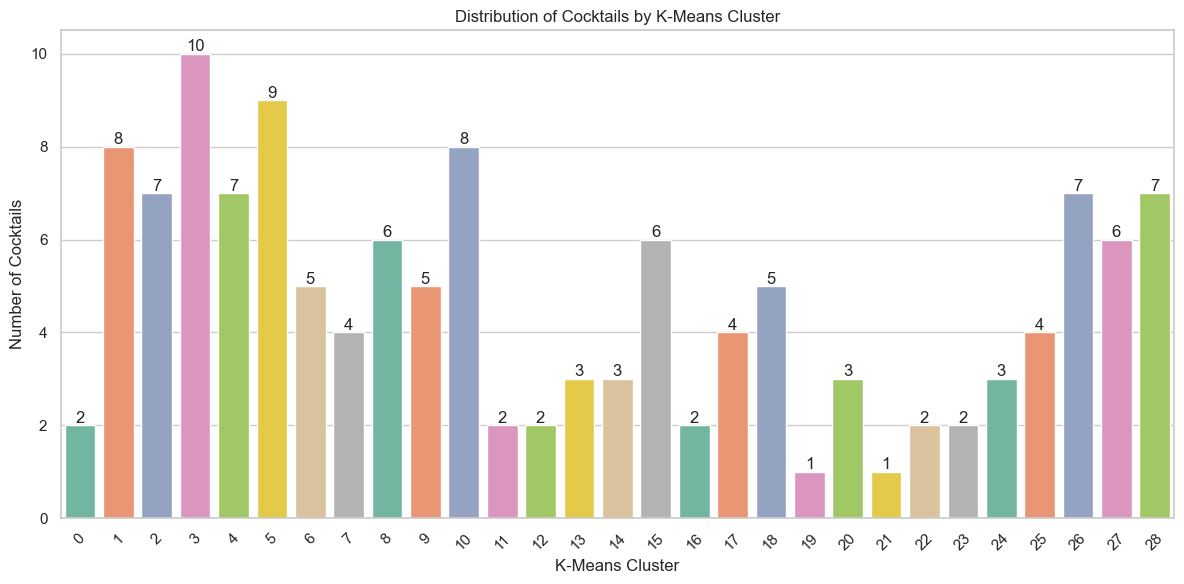

C:\Users\Marcel\AppData\Local\Temp\ipykernel_8668\2430472056.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_agg = sns.countplot(data=cocktails, x='agg_cluster', palette='Set1')


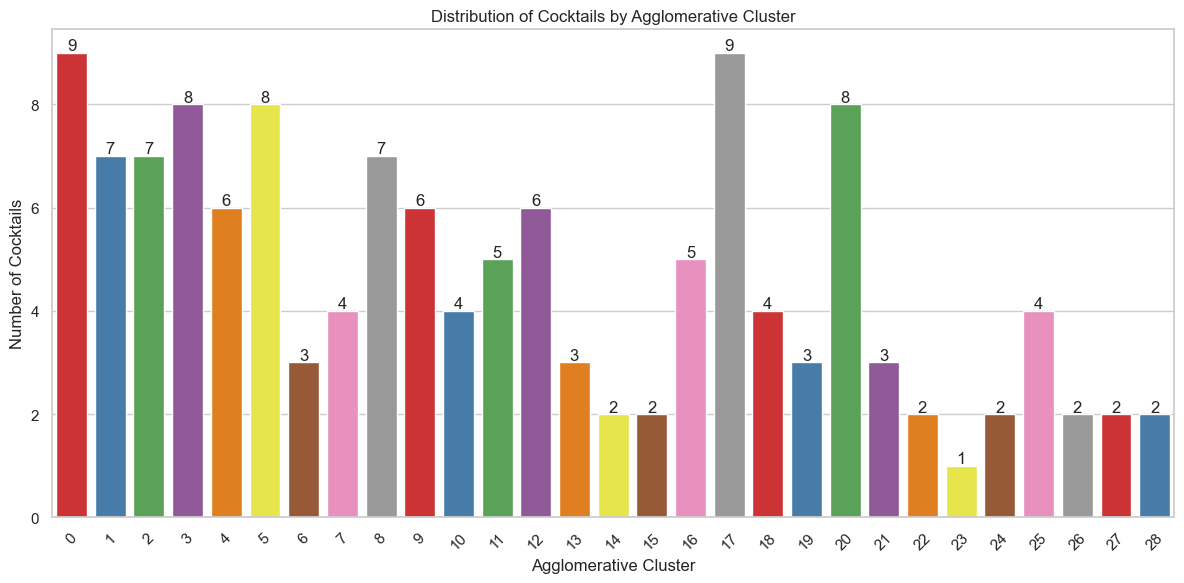

In [8]:
# Cell 1: Load libraries, data, set visualization style, and create annotated visualizations

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cocktail data
data_file = '../data/processed/clustered_cocktail_dataset.json'
cocktails = pd.read_json(data_file)

# Set visualization style
sns.set(style='whitegrid')

# Visualize the distribution of cocktails by K-Means cluster with annotations
plt.figure(figsize=(12, 6))
plot_kmeans = sns.countplot(data=cocktails, x='kmeans_cluster', palette='Set2')
plt.title('Distribution of Cocktails by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Cocktails')
plt.xticks(rotation=45)

# Add count annotations
for p in plot_kmeans.patches:
    plot_kmeans.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Visualize the distribution of cocktails by Agglomerative cluster with annotations
plt.figure(figsize=(12, 6))
plot_agg = sns.countplot(data=cocktails, x='agg_cluster', palette='Set1')
plt.title('Distribution of Cocktails by Agglomerative Cluster')
plt.xlabel('Agglomerative Cluster')
plt.ylabel('Number of Cocktails')
plt.xticks(rotation=45)

# Add count annotations
for p in plot_agg.patches:
    plot_agg.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


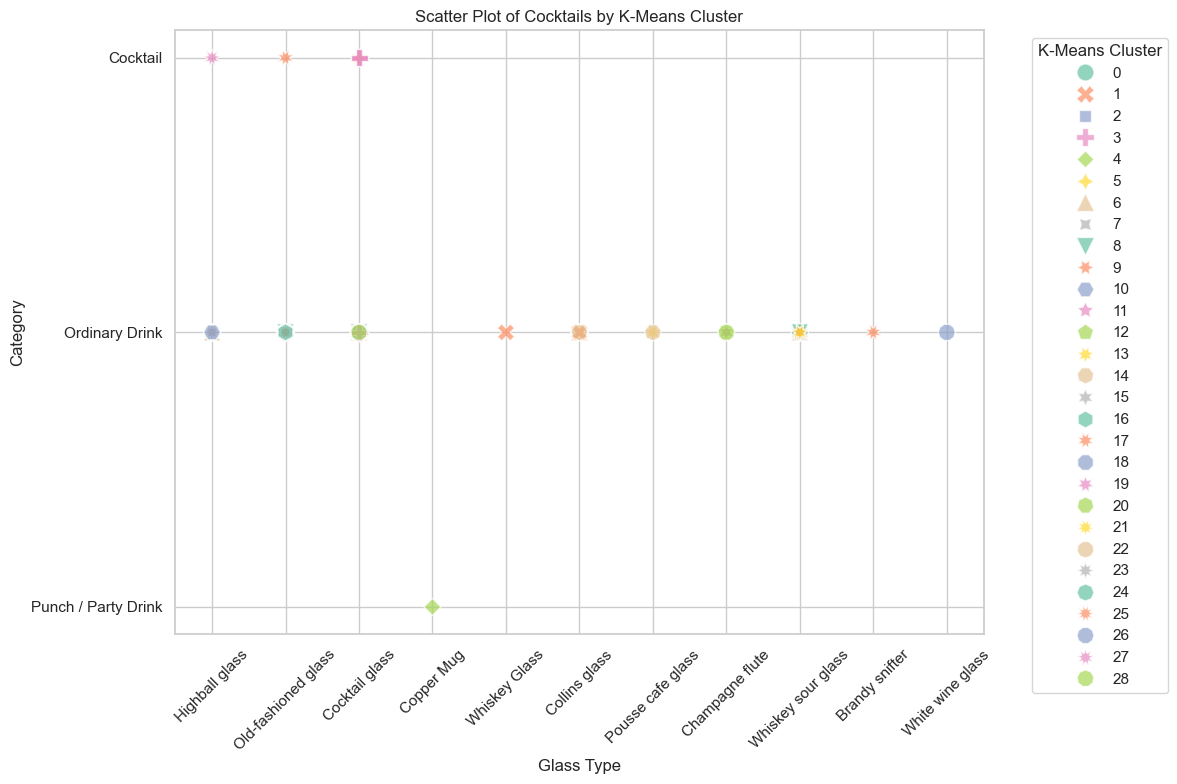

In [35]:
# Cell 2: Scatter plot to visualize the relationship between two features by K-Means cluster

# Define features for the scatter plot
x_feature = 'glass'  # Example feature on the x-axis
y_feature = 'category'  # Replace with your chosen feature for the y-axis

# Increase the height of the plot
plt.figure(figsize=(12, 8))  # Wider height for better visibility
scatter_plot = sns.scatterplot(data=cocktails, x=x_feature, y=y_feature, 
                                hue='kmeans_cluster', palette='Set2', 
                                style='kmeans_cluster', s=150, alpha=0.7)  # Increase marker size

# Update the title and labels
plt.title('Scatter Plot of Cocktails by K-Means Cluster')
plt.xlabel('Glass Type')  # Update with appropriate label for x-axis
plt.ylabel('Category')  # Update with appropriate label for y-axis

# Rotate x-axis labels if necessary to avoid overlap
plt.xticks(rotation=45)

# Legend settings
plt.legend(title='K-Means Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [38]:
# Cell 3: Display cocktails in each K-Means cluster

# Grouping cocktails by their K-Means cluster
clusters = cocktails.groupby('kmeans_cluster')['name'].apply(list).reset_index()

# Renaming columns for better clarity
clusters.columns = ['K-Means Cluster', 'Cocktails']

# Display the clusters
print(clusters)

# Optionally, you can display it as a DataFrame for better formatting in Jupyter Notebook
import pandas as pd

# Display clusters as a DataFrame
clusters_df = pd.DataFrame(clusters)



    K-Means Cluster                                          Cocktails
0                 0            [Classic Old-Fashioned, Brandy Cobbler]
1                 1  [Brandy Alexander, Almond Joy, Amaretto And Cr...
2                 2  [Alfie Cocktail, Algonquin, Blue Lagoon, Gin S...
3                 3  [Negroni, Dry Martini, Allies Cocktail, Artill...
4                 4  [Margarita, Moscow Mule, Blue Margarita, Drago...
5                 5  [Balmoral, Bobby Burns Cocktail, Clove Cocktai...
6                 6  [Alabama Slammer, Allegheny, Bourbon Sling, Bo...
7                 7  [After Dinner Cocktail, Archbishop, Frisco Sou...
8                 8  [After Supper Cocktail, Applecar, Arthur Tompk...
9                 9  [Gin Cooler, Gin Fizz, Imperial Fizz, Lady Lov...
10               10  [Blue Mountain, Boxcar, English Rose Cocktail,...
11               11               [Alaska Cocktail, Jewel Of The Nile]
12               12                [Arise My Love, Champagne Cocktail]
13    